In [3]:
# import packages
import numpy as np # NumPy is a Python package that stands for ‘Numerical Python’. It is the core library for scientific computing
import pandas as pd # Pandas is used for data manipulation, analysis and cleaning.
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
import matplotlib # powerful plotting library for python that offers a varied spectrum of 1D, 2D, and 3D visualizations. 
from matplotlib import pyplot as plt
%matplotlib inline
import re
import bs4
import requests
import spacy
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()
from spacy.matcher import Matcher
from spacy.tokens import Span 


pd.set_option('display.max_colwidth', 200)


In [30]:
#datasentiment = pd.read_csv("Emotion.csv", encoding='utf-16') #  imports a CSV file to DataFrame format
datasentiment = pd.read_csv('Emotion.csv', engine='python')
datasentiment # read csv

,id,Text,Emotion,confidence
0,30000,Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I don't think I have laughed so much in a long time! ??,joy,0.958
2,30002,Been waiting all week for this game ?????? #cheer #friday ??,joy,0.940
3,30003,"@gardiner_love : Thank you so much, Gloria! You're so sweet, and thoughtful! You just made my day more joyful! I love you too! ????",joy,0.938
4,30004,"I feel so blessed to work with the family that I nanny for ?? nothing but love &amp; appreciation, makes me smile.",joy,0.938
...,...,...,...,...
2576,40781,@VivienLloyd Thank you so much! Just home - stunned but so happy. Don't think it has sunk in yet! Wow.,sadness,0.104
2577,40782,Just put the winter duvet on ????????,sadness,0.104
2578,40783,@SilkInSide @TommyJoeRatliff that's so pretty! I love the sky in the background and the purple highlights with the dull colors is great,sadness,0.088
2579,40784,@BluesfestByron second artist announcement looking good #bluesfest2017 #blues #Music #byronbay,sadness,0.083


In [31]:
datasentiment.info() # concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2581 non-null   int64  
 1   Text        2581 non-null   object 
 2   Emotion     2581 non-null   object 
 3   confidence  2581 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 80.8+ KB


In [32]:
datasentiment.head()  #  return top n (5 by default) rows of a data frame

,id,Text,Emotion,confidence
0,30000,Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I don't think I have laughed so much in a long time! ??,joy,0.958
2,30002,Been waiting all week for this game ?????? #cheer #friday ??,joy,0.940
3,30003,"@gardiner_love : Thank you so much, Gloria! You're so sweet, and thoughtful! You just made my day more joyful! I love you too! ????",joy,0.938
4,30004,"I feel so blessed to work with the family that I nanny for ?? nothing but love &amp; appreciation, makes me smile.",joy,0.938


In [33]:
datasentiment.tail() #  return bottom n (5 by default) rows of a data frame

,id,Text,Emotion,confidence
2576,40781,@VivienLloyd Thank you so much! Just home - stunned but so happy. Don't think it has sunk in yet! Wow.,sadness,0.104
2577,40782,Just put the winter duvet on ????????,sadness,0.104
2578,40783,@SilkInSide @TommyJoeRatliff that's so pretty! I love the sky in the background and the purple highlights with the dull colors is great,sadness,0.088
2579,40784,@BluesfestByron second artist announcement looking good #bluesfest2017 #blues #Music #byronbay,sadness,0.083
2580,40785,"I can literally eat creamy pesto pasta topped with grilled chicken, sun dried tomatoes, asparagus and pine nuts every single day of my life",sadness,0.083


In [34]:
datasentiment.shape # rows, columns

(2581, 4)

In [35]:
# Function Definition
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [36]:
datasentiment['Text'] = datasentiment['Text'].apply(remove_punctuation)
datasentiment.head(10)

,id,Text,Emotion,confidence
0,30000,Just got back from seeing GaryDelaney in Burslem AMAZING Face still hurts from laughing so much hilarious,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I dont think I have laughed so much in a long time,joy,0.958
2,30002,Been waiting all week for this game cheer friday,joy,0.940
3,30003,gardinerlove Thank you so much Gloria Youre so sweet and thoughtful You just made my day more joyful I love you too,joy,0.938
4,30004,I feel so blessed to work with the family that I nanny for nothing but love amp appreciation makes me smile,joy,0.938
5,30005,Today I reached 1000 subscribers on YT goodday thankful,joy,0.926
6,30006,Singaholic121 Good morning love Happy first day of fall Lets make some awesome autumnmemories annabailey laughter smile,joy,0.924
7,30007,BridgetJonesBaby is the best thing Ive seen in ages So funny Ive missed Bridget love TeamMark,joy,0.922
8,30008,Just got back from seeing GaryDelaney in Burslem AMAZING Face still hurts from laughing so much,joy,0.920
9,30009,IndyMN I thought the holidays could not get any more cheerful and then I met you TheNiceBot,joy,0.917


In [37]:
stp = open("stop.txt", 'r', encoding = "utf-8")
stp_list = list(stp)
# extracting the stopwords from nltk library
sw = stopwords.words('english') + stp_list
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', ..., 'zero\n', 'zm\n', 'zr'], dtype='<U16')

In [38]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [39]:
datasentiment['Text'] = datasentiment['Text'].apply(stopwords)
datasentiment.head(10)

,id,Text,Emotion,confidence
0,30000,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.980
1,30001,oh dear evening absolute hilarity dont think laughed much long time,joy,0.958
2,30002,waiting week game cheer friday,joy,0.940
3,30003,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.938
4,30004,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.938
5,30005,today reached 1000 subscribers yt goodday thankful,joy,0.926
6,30006,singaholic121 good morning love happy first day fall lets make awesome autumnmemories annabailey laughter smile,joy,0.924
7,30007,bridgetjonesbaby best thing ive seen ages funny ive missed bridget love teammark,joy,0.922
8,30008,got back seeing garydelaney burslem amazing face still hurts laughing much,joy,0.920
9,30009,indymn thought holidays could get cheerful met thenicebot,joy,0.917


In [40]:
import warnings 
warnings.filterwarnings('ignore')

In [41]:
# Removal of special characters and replace with space
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","�","$"]
for char in spec_chars:
    datasentiment['Text'] = datasentiment['Text'].str.replace(char, ' ')


In [42]:
datasentiment.head()

,id,Text,Emotion,confidence
0,30000,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.980
1,30001,oh dear evening absolute hilarity dont think laughed much long time,joy,0.958
2,30002,waiting week game cheer friday,joy,0.940
3,30003,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.938
4,30004,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.938


In [43]:
# removal of numbers
def number_removal(text):
    if type(text) == int:
        return text
    else:
        text = ''.join([i for i in text if not i.isdigit()])
        return text

In [44]:
datasentiment['Text'] = datasentiment['Text'].apply(number_removal)
datasentiment.head()

,id,Text,Emotion,confidence
0,30000,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.980
1,30001,oh dear evening absolute hilarity dont think laughed much long time,joy,0.958
2,30002,waiting week game cheer friday,joy,0.940
3,30003,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.938
4,30004,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.938


In [45]:
ADDITIONAL_STOPWORDS = ['dont','cant']

In [46]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [47]:
words = basic_clean(''.join(str(datasentiment['Text'].tolist())))

In [48]:
words[:30]

['got',
 'back',
 'seeing',
 'garydelaney',
 'burslem',
 'amazing',
 'face',
 'still',
 'hurt',
 'laughing',
 'much',
 'hilarious',
 'oh',
 'dear',
 'evening',
 'absolute',
 'hilarity',
 'think',
 'laughed',
 'much',
 'long',
 'time',
 'waiting',
 'week',
 'game',
 'cheer',
 'friday',
 'gardinerlove',
 'thank',
 'much']

In [49]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(amazing, lively)        54
(watch, amazing)         54
(lively, broadcast)      54
(lively, musically)      26
(feel, like)             17
(look, like)             13
(musically, watch)       11
(happy, birthday)         9
(panic, attack)           9
(im, afraid)              9
(im, still)               9
(first, time)             8
(every, time)             8
(good, morning)           8
(sparkling, water)        7
(ive, seen)               7
(penny, dreadful)         7
(get, discouraged)        7
(im, sure)                7
(amp, im)                 7
(last, night)             6
(tell, im)                6
(awareness, time)         6
(accept, challenge)       6
(grow, weary)             6
(depression, anxiety)     6
(im, sorry)               6
(horror, story)           6
(feel, exhilaration)      6
(ive, ever)               6
dtype: int64

In [50]:
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

<AxesSubplot:>

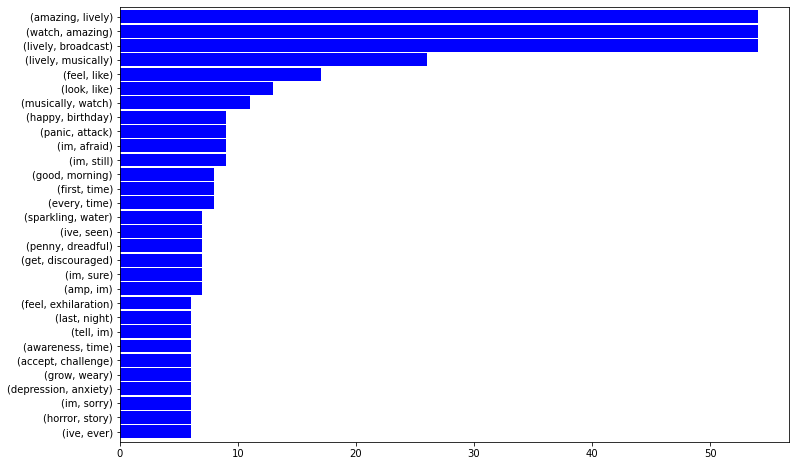

In [51]:
bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [52]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(datasentiment['Text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(2581, 18123)
['aaa cam', 'ab workout', 'abbys way', 'abc nra', 'aberdeen st', 'ability make', 'ability process', 'abla kaml', 'able check', 'able get', 'able use', 'abomination affront', 'abortion yet', 'abraham lincoln', 'abs defined', 'abscess need', 'absolute delight', 'absolute despair', 'absolute hilarity', 'absolute hope', 'absolute horror', 'absolute nightmare', 'absolutely amazing', 'absolutely believe', 'absolutely dreadful', 'absolutely exhilarating', 'absolutely fucking', 'absolutely glorious', 'absolutely idea', 'absolutely love', 'absolutely shocking', 'absurd could', 'abuse got', 'abuses uk', 'abysmal ignorance', 'abysmal team', 'academic writers', 'acapella college', 'acc try', 'accept challenges', 'accept going', 'accept gratefully', 'accept lost', 'accept sherlock', 'accepts bribe', 'accidentally caused', 'accidentally scared', 'accidentally small', 'accomplish today', 'accomplishments trump', 'account delight', 'account make', 'accounting today', 'accounts well', 'ac

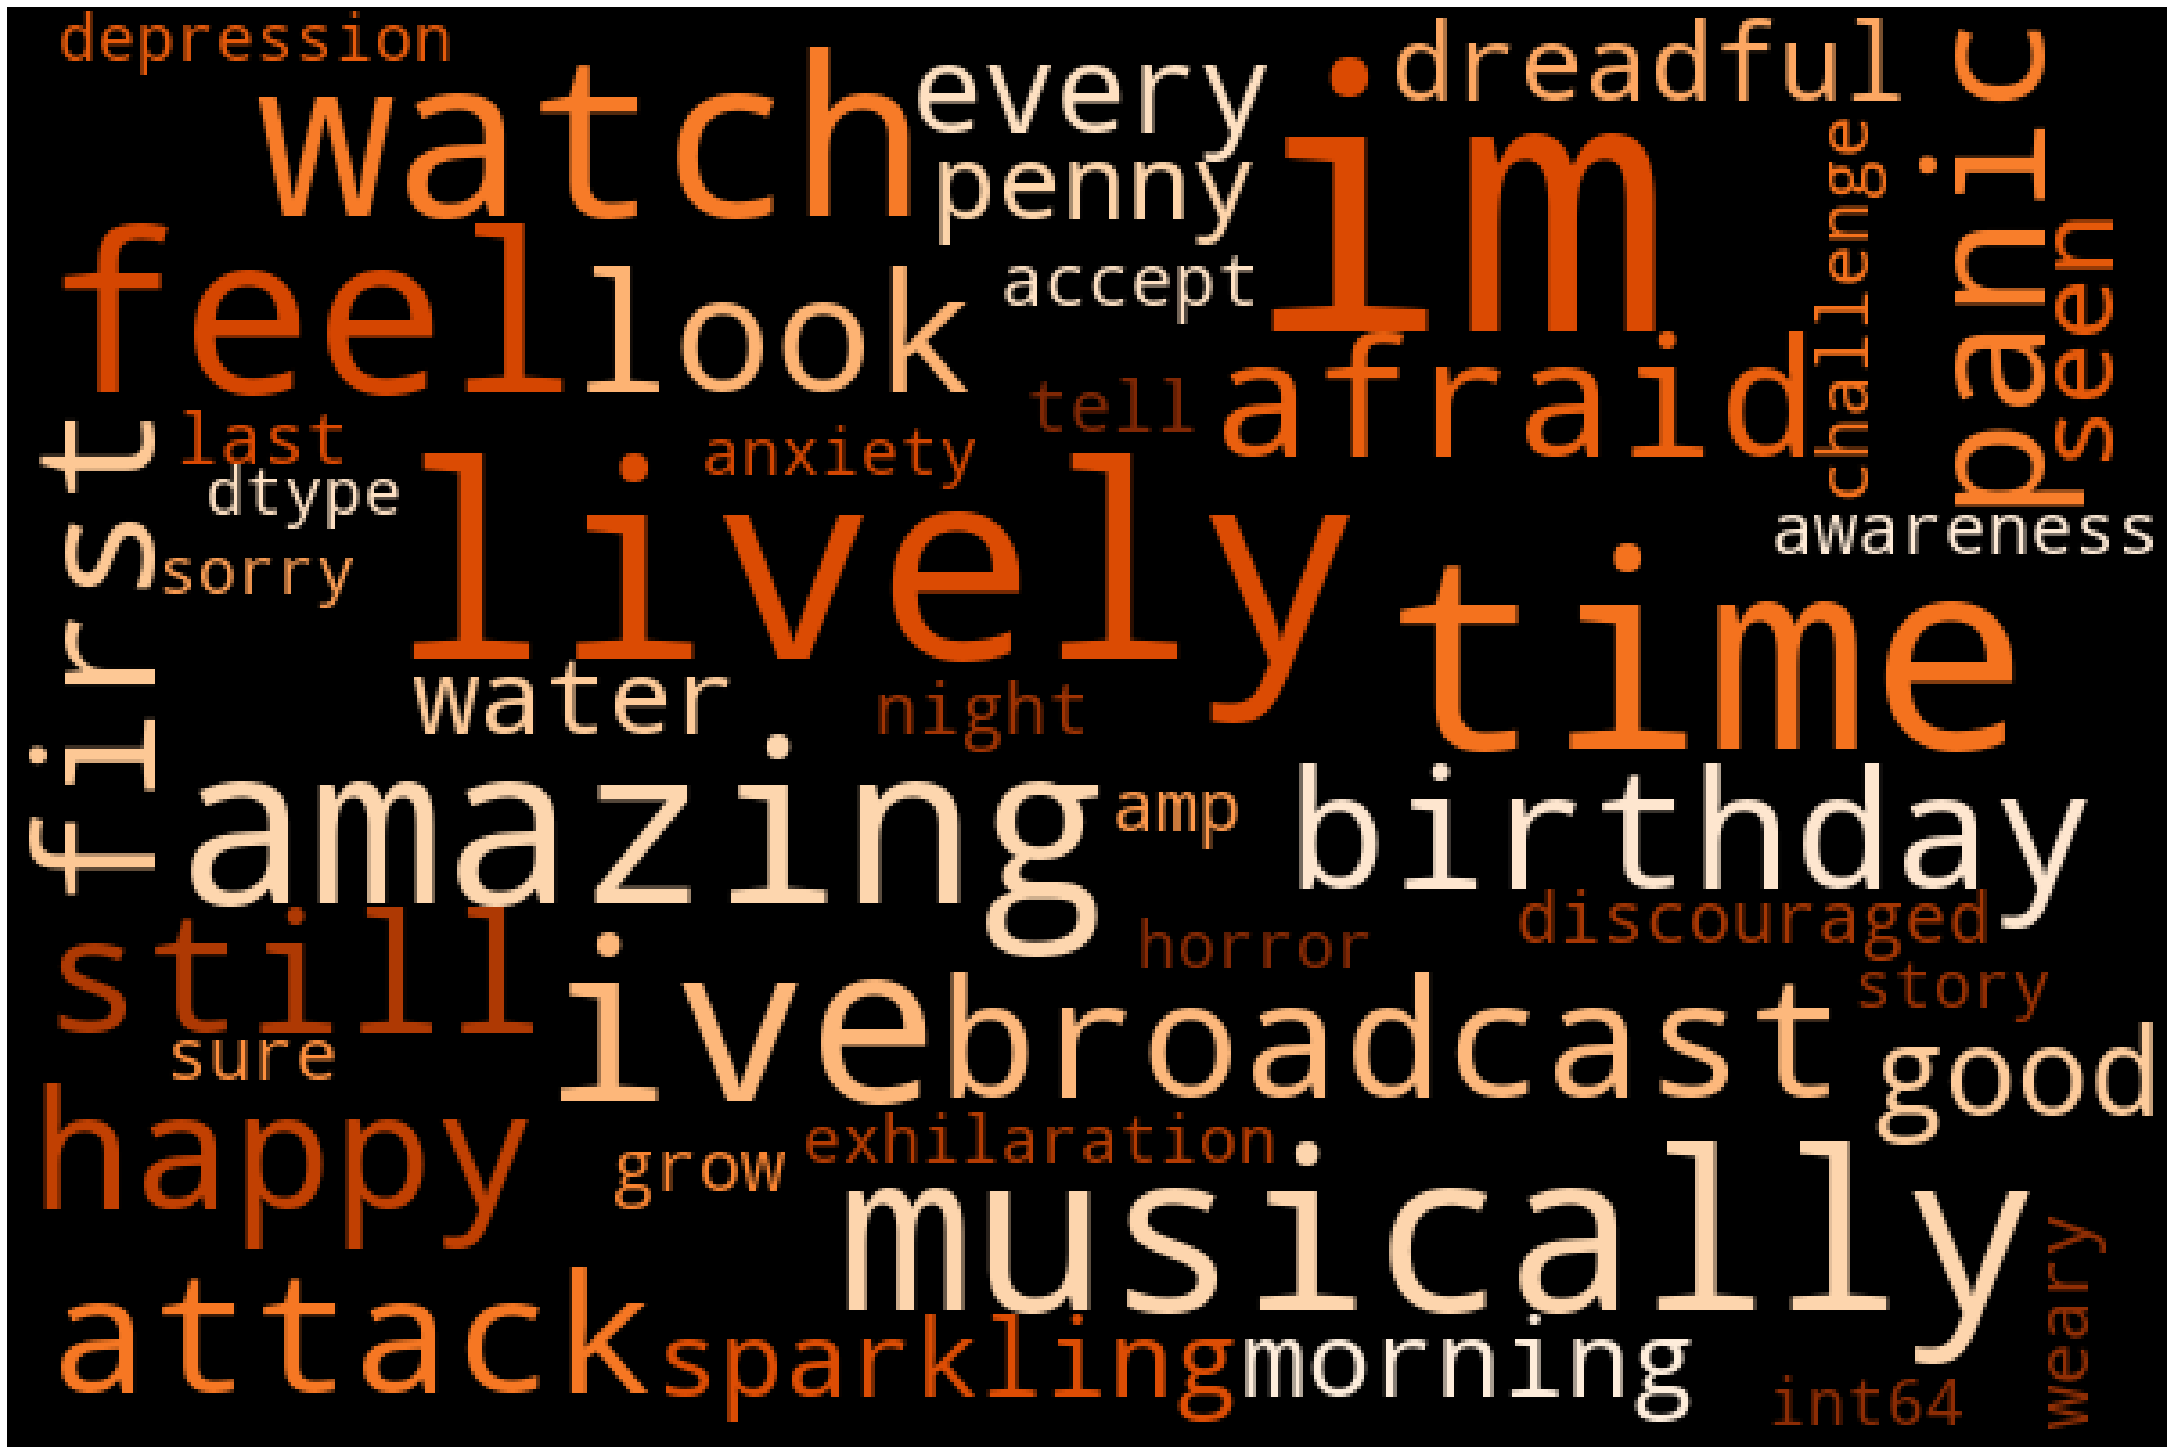

In [54]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(bigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]

(amazing, lively, broadcast)       54
(watch, amazing, lively)           54
(musically, watch, amazing)        11
(lively, musically, watch)          6
(accept, challenge, feel)           5
(juggle, didnt, ball)               5
(see, good, side)                   5
(everything, good, see)             5
(man, know, juggle)                 5
(happy, everything, good)           5
(challenge, feel, exhilaration)     5
(feel, exhilaration, victory)       5
(know, juggle, didnt)               5
(good, side, everything)            5
(good, see, good)                   5
(pun, punny, lol)                   4
(glee, glee, glee)                  4
(quotesoup, happy, everything)      4
(grow, weary, good)                 4
(american, horror, story)           4
(hard, awful, depression)           3
(ur, inner, peace)                  3
(ball, itn, funny)                  3
(amymek, absurd, could)             3
(didnt, feel, like)                 3
(absurd, could, laugh)              3
(wanna, go, 

In [56]:
trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]

<AxesSubplot:>

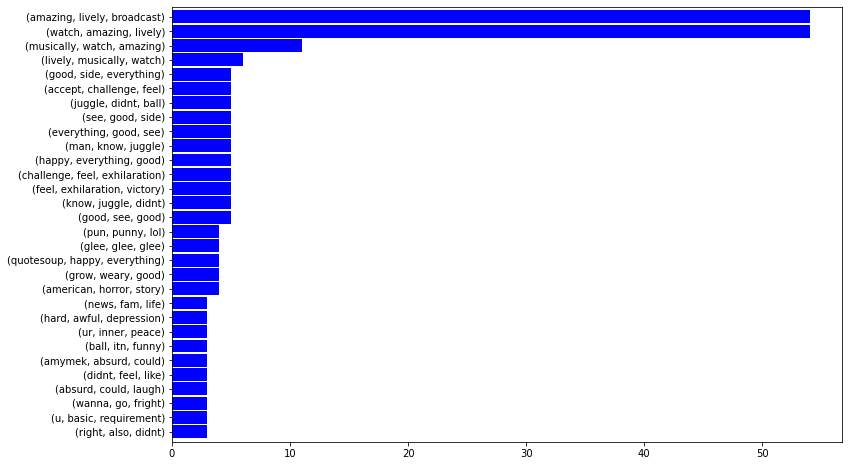

In [57]:
trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [58]:
ngram_vect = CountVectorizer(ngram_range=(3,3))
X_counts = ngram_vect.fit_transform(datasentiment['Text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(2581, 16713)
['aaa cam animated', 'ab workout maybe', 'abbys way long', 'abc nra rejoice', 'aberdeen st johnstone', 'ability make someone', 'ability process sadness', 'abla kaml fga', 'able check things', 'able get weeks', 'able use generic', 'abomination affront god', 'abortion yet constitutional', 'abs defined time', 'abscess need dentist', 'absolute delight children', 'absolute hilarity dont', 'absolute hope born', 'absolute horror icing', 'absolutely believe generosity', 'absolutely dreadful class', 'absolutely dreadful see', 'absolutely exhilarating wch', 'absolutely fucking grim', 'absolutely idea time', 'absolutely love anxiety', 'absolutely shocking decline', 'absurd could laugh', 'abuse got really', 'abuses uk troops', 'abysmal ignorance frivolity', 'abysmal team dreadful', 'academic writers say', 'acapella college kids', 'acc try friendship', 'accept challenges feel', 'accept challenges may', 'accept going change', 'accept gratefully everyone', 'accept sherlock holmes', 'acc

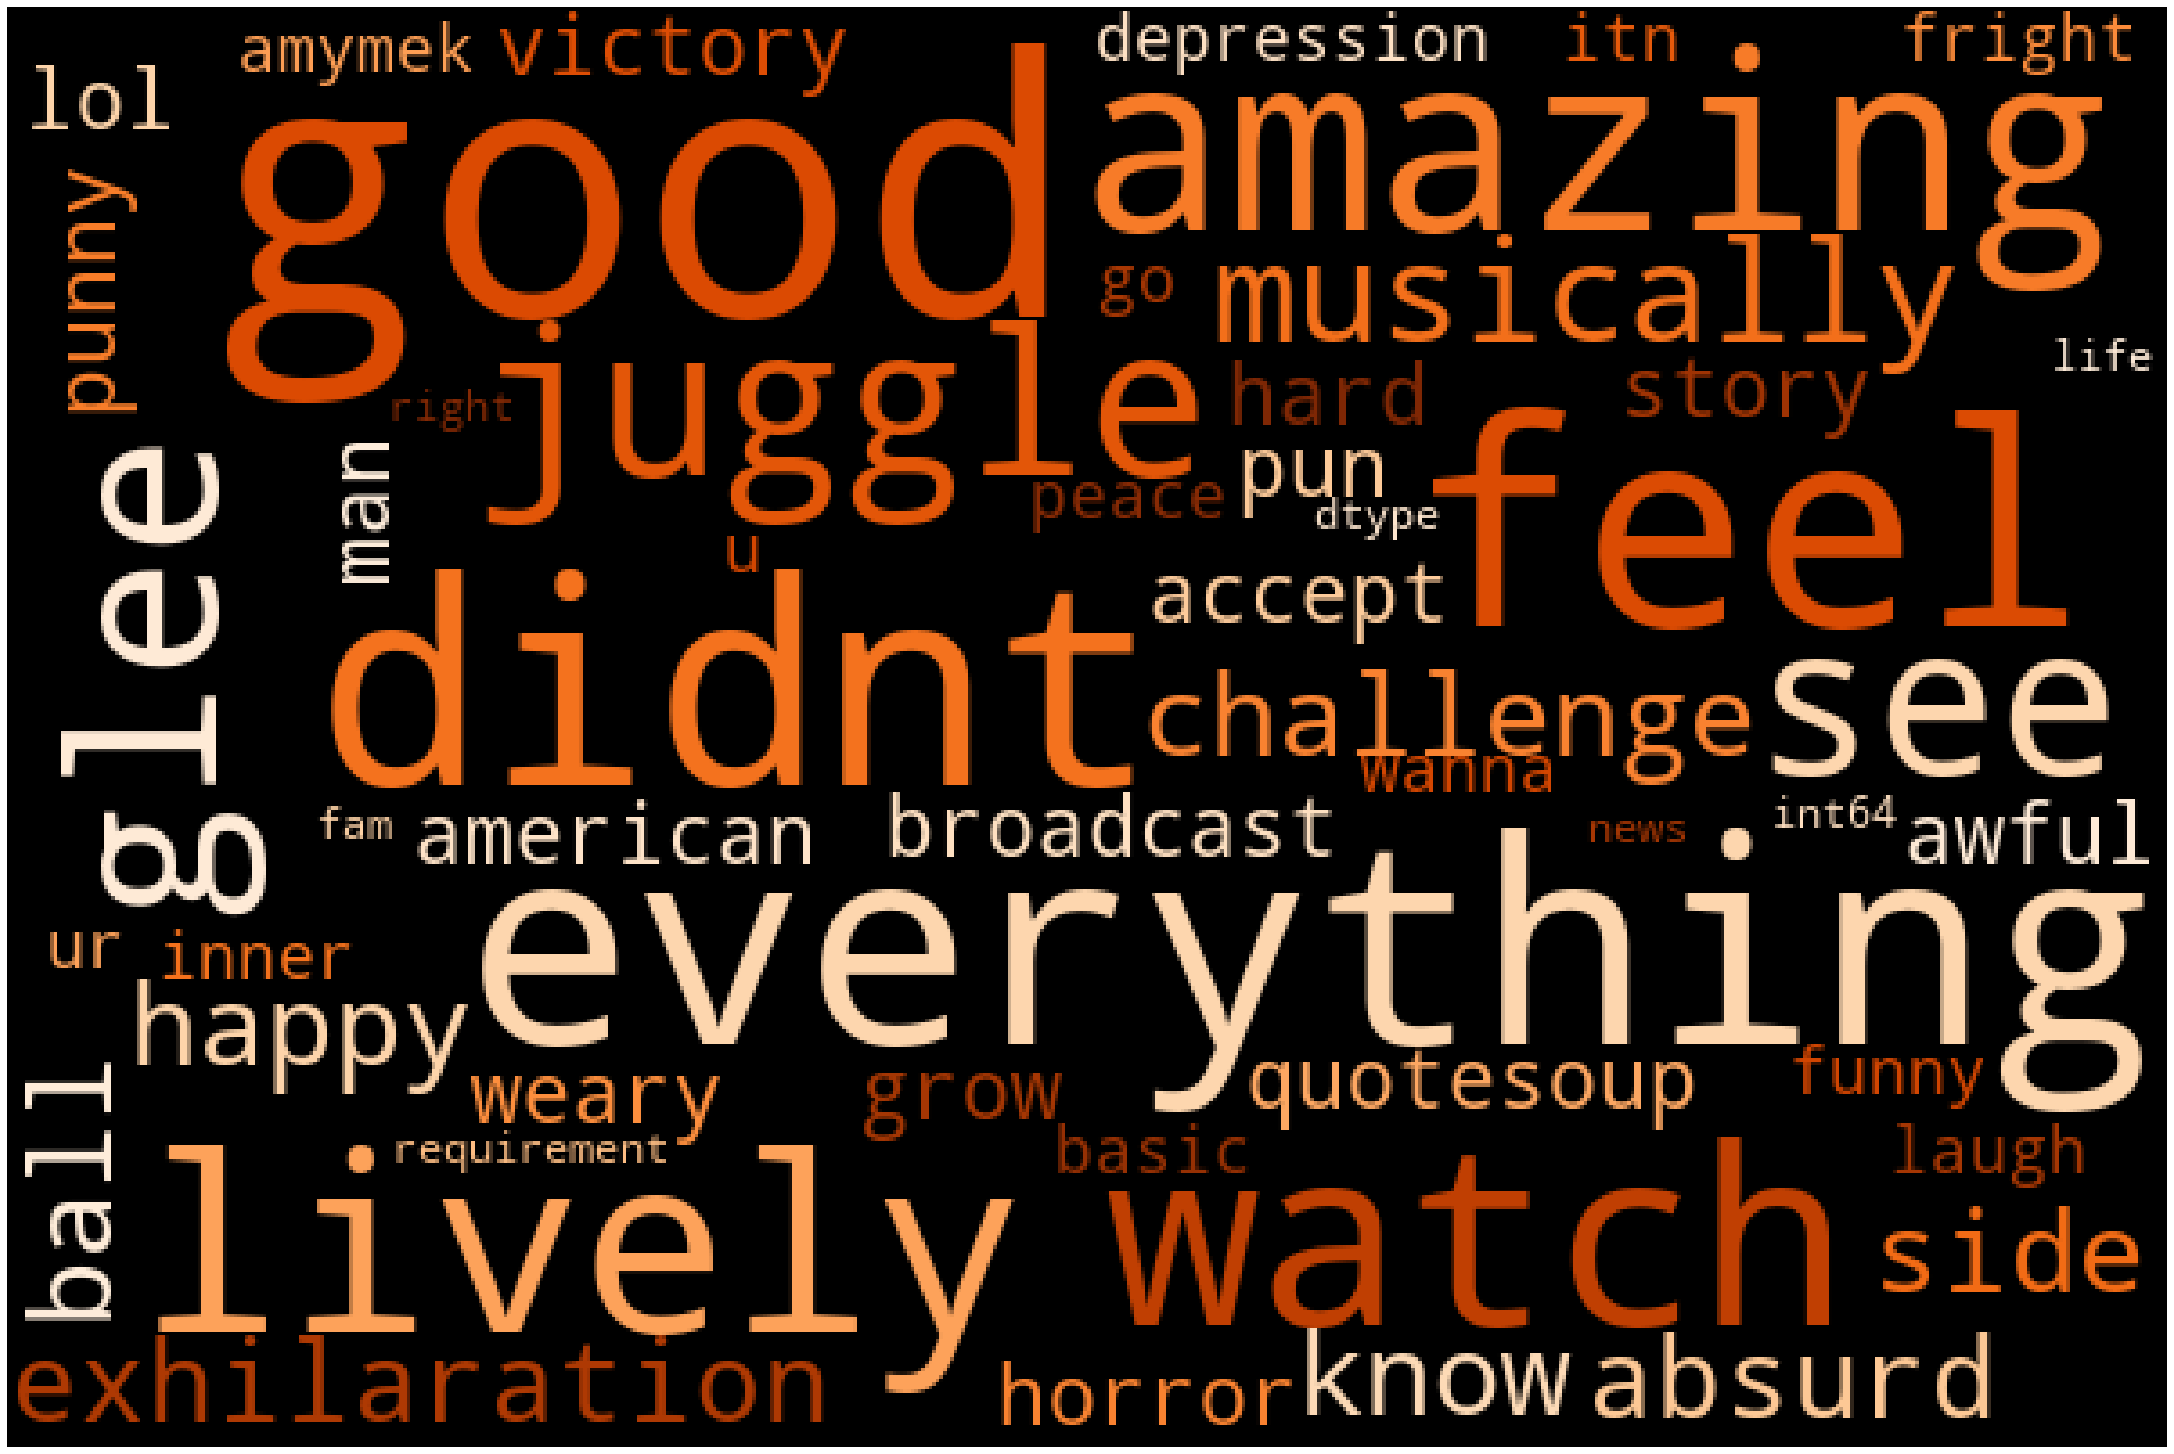

In [59]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(trigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [60]:
unigrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]

<AxesSubplot:>

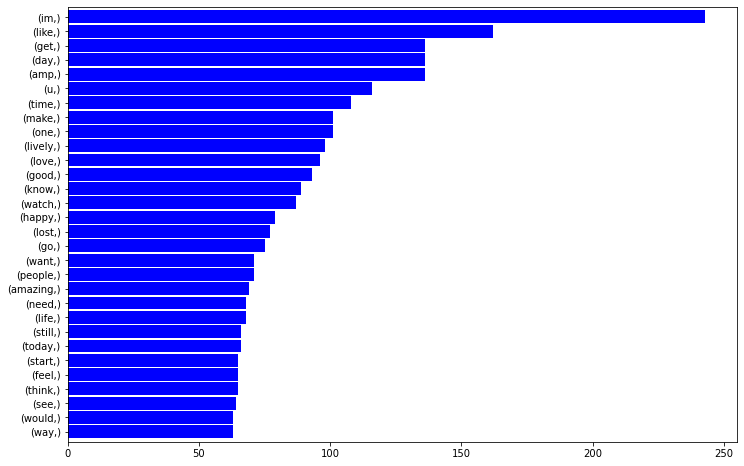

In [61]:
unigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

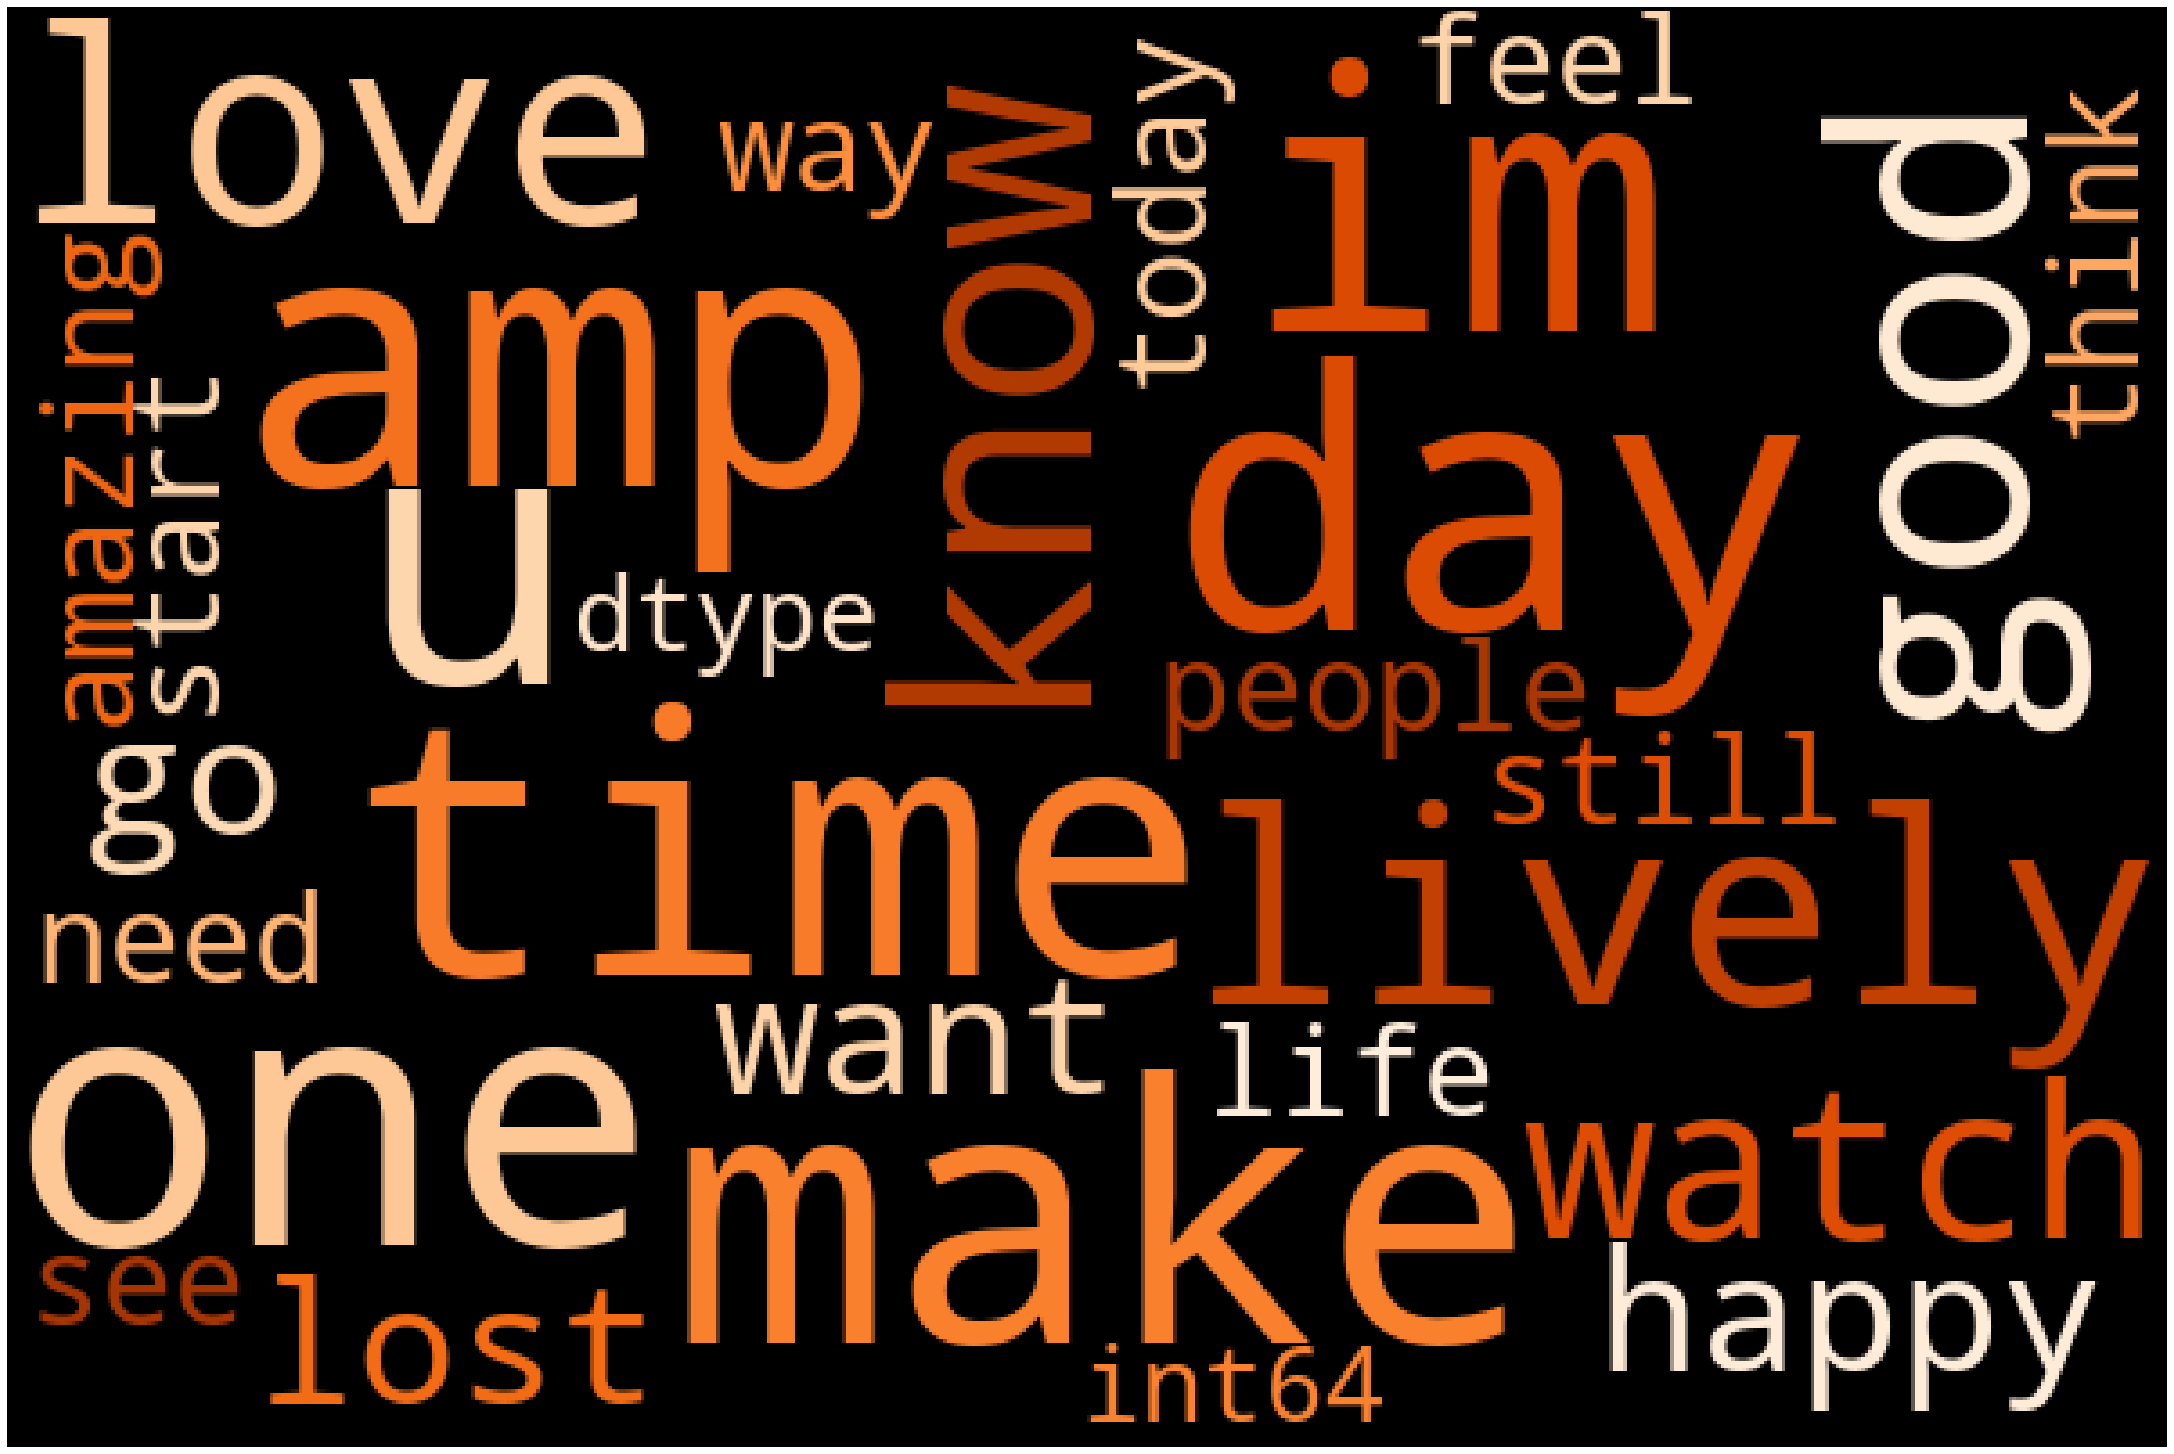

In [62]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(unigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [63]:
processed_docs = datasentiment['Text']
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(processed_docs)

CountVectorizer(token_pattern='\\w{1,}')

In [64]:
count_vec =  count_vect.transform(processed_docs)

In [65]:
from sklearn.cluster import KMeans

In [70]:
final_model=KMeans(2)
final_model.fit(count_vec)
prediction=final_model.predict(count_vec)

In [71]:
datasentiment["clusters"] = prediction

<AxesSubplot:xlabel='clusters', ylabel='count'>

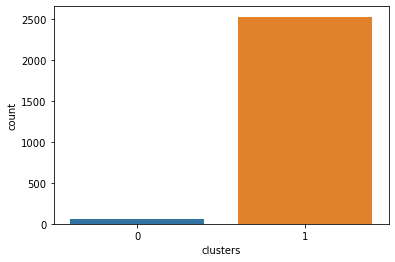

In [72]:
import seaborn as sns
sns.countplot(datasentiment["clusters"])

In [73]:
datasentiment  #datasentiment['Emotion'].value_counts()

,id,Text,Emotion,confidence,clusters
0,30000,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.980,1
1,30001,oh dear evening absolute hilarity dont think laughed much long time,joy,0.958,1
2,30002,waiting week game cheer friday,joy,0.940,1
3,30003,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.938,1
4,30004,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.938,1
...,...,...,...,...,...
2576,40781,vivienlloyd thank much home stunned happy dont think sunk yet wow,sadness,0.104,1
2577,40782,put winter duvet,sadness,0.104,1
2578,40783,silkinside tommyjoeratliff thats pretty love sky background purple highlights dull colors great,sadness,0.088,1
2579,40784,bluesfestbyron second artist announcement looking good bluesfest blues music byronbay,sadness,0.083,1


In [76]:
X = datasentiment['Text']
y = datasentiment['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipe_mnnb = Pipeline(steps = [('tf', TfidfVectorizer()), ('mnnb', MultinomialNB())])

pgrid_mnnb = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'mnnb__alpha' : [0.1, 0.5, 1]
}

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
gs_mnnb = GridSearchCV(pipe_mnnb,pgrid_mnnb,cv=5,n_jobs=-1)
gs_mnnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': ['english', None],
                         'tf__use_idf': [True, False]})

In [77]:
gs_mnnb.score(X_train, y_train)
gs_mnnb.score(X_test, y_test)

1.0

In [78]:
X = datasentiment['Text']
y = datasentiment['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipe_mnnb = Pipeline(steps = [('tf', TfidfVectorizer()), ('mnnb', MultinomialNB())])

pgrid_mnnb = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'mnnb__alpha' : [0.1, 0.5, 1]
}

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
gs_mnnb = GridSearchCV(pipe_mnnb,pgrid_mnnb,cv=5,n_jobs=-1)
gs_mnnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': ['english', None],
                         'tf__use_idf': [True, False]})

In [79]:
gs_mnnb.score(X_train, y_train)
gs_mnnb.score(X_test, y_test)

0.8111455108359134

In [170]:

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(datasentiment['Text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [171]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [172]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [173]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [174]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,im,209.2,way,58.1,life,61.0,day,111.1,like,116.0,lively,98.1,lost,77.1,go,66.1,get,119.3,amp,136.1
1,dont,117.2,always,57.1,today,51.7,great,48.1,time,93.8,watch,87.1,sad,59.1,need,55.1,one,75.1,happy,79.0
2,u,70.1,going,44.6,feel,49.3,start,40.3,never,48.8,amazing,69.1,terrorism,43.1,much,51.2,would,63.1,people,66.8
3,still,66.1,youre,44.6,fear,49.1,thats,40.1,ive,43.1,broadcast,54.1,want,37.7,love,51.2,terror,37.1,think,64.1
4,see,52.1,hilarious,39.1,depression,44.1,night,32.1,first,42.1,musically,54.1,makes,34.1,back,48.7,really,36.6,smile,51.1
5,know,44.9,horror,38.1,give,41.1,every,31.8,make,41.4,glee,34.1,right,31.1,serious,46.1,anxiety,33.2,good,47.8
6,panic,35.0,sober,31.1,even,31.0,terrible,31.1,optimism,41.1,blues,32.1,little,29.1,lol,40.1,like,32.6,afraid,43.1
7,hope,30.1,im,30.3,worst,28.1,laughter,30.1,nightmare,38.1,thanks,27.6,feeling,28.1,new,34.3,cant,31.5,us,37.9
8,could,29.6,shocking,29.1,ever,27.4,god,30.1,nervous,37.1,well,25.9,oh,28.1,next,31.1,things,30.1,let,31.9
9,bad,23.8,tell,27.1,made,25.1,morning,29.1,best,32.1,away,21.9,home,25.1,stop,29.4,something,30.0,dont,27.6


In [175]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(datasentiment['Text'])
txt_transformed = txt_fitted.transform(datasentiment['Text'])
print ("The text: ", datasentiment['Text'])

The text:  0                                       got back seeing garydelaney burslem amazing face still hurts laughing much hilarious
1                                                        oh dear evening absolute hilarity dont think laughed much long time
2                                                                                             waiting week game cheer friday
3                                                 gardinerlove thank much gloria youre sweet thoughtful made day joyful love
4                                                   feel blessed work family nanny nothing love amp appreciation makes smile
                                                                ...                                                         
2576                                                       vivienlloyd thank much home stunned happy dont think sunk yet wow
2577                                                                                                        put wi

In [176]:
ab = tf.vocabulary_
ab

{'got': 2861,
 'back': 490,
 'seeing': 6277,
 'garydelaney': 2712,
 'burslem': 969,
 'amazing': 215,
 'face': 2313,
 'still': 6782,
 'hurts': 3291,
 'laughing': 3915,
 'much': 4651,
 'hilarious': 3158,
 'oh': 5025,
 'dear': 1694,
 'evening': 2234,
 'absolute': 14,
 'hilarity': 3159,
 'dont': 1942,
 'think': 7200,
 'laughed': 3914,
 'long': 4107,
 'time': 7258,
 'waiting': 7717,
 'week': 7802,
 'game': 2697,
 'cheer': 1152,
 'friday': 2617,
 'gardinerlove': 2709,
 'thank': 7121,
 'gloria': 2803,
 'youre': 8071,
 'sweet': 6948,
 'thoughtful': 7219,
 'made': 4206,
 'day': 1674,
 'joyful': 3692,
 'love': 4146,
 'feel': 2402,
 'blessed': 758,
 'work': 7935,
 'family': 2353,
 'nanny': 4705,
 'nothing': 4926,
 'amp': 233,
 'appreciation': 338,
 'makes': 4231,
 'smile': 6546,
 'today': 7293,
 'reached': 5775,
 'subscribers': 6856,
 'yt': 8084,
 'goodday': 2844,
 'thankful': 7122,
 'singaholic': 6464,
 'good': 2840,
 'morning': 4594,
 'happy': 3037,
 'first': 2472,
 'fall': 2340,
 'lets': 3981,

In [177]:
freq={}
for word in words:
    count=freq.get(word,0)
    freq[word]=count + 1

In [178]:
frequency_list = freq.keys()

In [179]:
for words in frequency_list:
    print(words + ' -> ' + str(freq[words]))

got -> 48
back -> 53
seeing -> 10
garydelaney -> 2
burslem -> 2
amazing -> 69
face -> 25
still -> 66
hurt -> 11
laughing -> 11
much -> 57
hilarious -> 39
oh -> 28
dear -> 8
evening -> 9
absolute -> 7
hilarity -> 16
think -> 65
laughed -> 2
long -> 24
time -> 108
waiting -> 10
week -> 39
game -> 23
cheer -> 20
friday -> 8
gardinerlove -> 1
thank -> 26
gloria -> 1
youre -> 46
sweet -> 14
thoughtful -> 2
made -> 25
day -> 136
joyful -> 24
love -> 96
feel -> 65
blessed -> 8
work -> 36
family -> 14
nanny -> 1
nothing -> 16
amp -> 136
appreciation -> 1
make -> 101
smile -> 53
today -> 66
reached -> 2
subscriber -> 2
yt -> 2
goodday -> 6
thankful -> 2
singaholic -> 2
good -> 93
morning -> 30
happy -> 79
first -> 42
fall -> 9
let -> 54
awesome -> 5
autumnmemories -> 2
annabailey -> 2
laughter -> 30
bridgetjonesbaby -> 2
best -> 32
thing -> 52
ive -> 43
seen -> 19
age -> 10
funny -> 24
missed -> 3
bridget -> 2
teammark -> 2
indymn -> 1
thought -> 27
holiday -> 4
could -> 40
get -> 136
cheerful 

In [180]:
results = []

In [181]:
for word in frequency_list:
    tuple = (word, freq[word])
    results.append(tuple)

In [182]:
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

In [183]:
byFreq[:30]

[('im', 243),
 ('like', 162),
 ('day', 136),
 ('amp', 136),
 ('get', 136),
 ('u', 117),
 ('time', 108),
 ('make', 101),
 ('one', 101),
 ('lively', 98),
 ('love', 96),
 ('good', 93),
 ('know', 89),
 ('watch', 87),
 ('happy', 79),
 ('lost', 77),
 ('go', 75),
 ('want', 71),
 ('people', 71),
 ('amazing', 69),
 ('life', 68),
 ('need', 68),
 ('still', 66),
 ('today', 66),
 ('think', 65),
 ('feel', 65),
 ('start', 65),
 ('see', 64),
 ('way', 63),
 ('would', 63)]

In [184]:
words_names=[]
words_count=[]
for (word, freq) in byFreq[:30]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

im 243
like 162
day 136
amp 136
get 136
u 117
time 108
make 101
one 101
lively 98
love 96
good 93
know 89
watch 87
happy 79
lost 77
go 75
want 71
people 71
amazing 69
life 68
need 68
still 66
today 66
think 65
feel 65
start 65
see 64
way 63
would 63


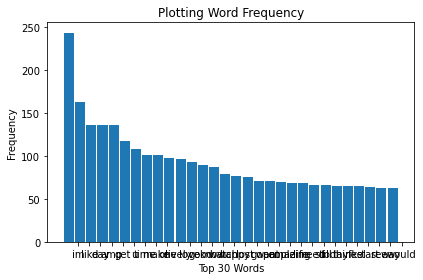

In [185]:

# Plot histogram using matplotlib bar()
plt.xlabel('Top 30 Words')
plt.ylabel('Frequency')
plt.title('Plotting Word Frequency')
indexes = np.arange(len(words_names) )
width = 0.9
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * 0.9, words_names)
#plt.legend()
plt.tight_layout()
plt.show()

In [130]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SRIVANI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [131]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [132]:
sid = SentimentIntensityAnalyzer()

In [133]:
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(str(datasentiment['Text']))

In [134]:
# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 0.9949, neg: 0.086, neu: 0.525, pos: 0.39, 

In [135]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [136]:
def print_sentiment_scores(sentiment):
    snt = analyser.polarity_scores(sentiment)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentiment, str(snt)))

In [137]:
print_sentiment_scores("got back seeing garydelaney burslem amazing face still hurts laughing much hilarious") #Compound value scale = -1 to 1 (-ve to +ve)

got back seeing garydelaney burslem amazing face still hurts laughing much hilarious {'neg': 0.149, 'neu': 0.385, 'pos': 0.466, 'compound': 0.765}


In [138]:
   
datasentiment = datasentiment.drop(['id', 'confidence'], axis=1) # Drop clusters also
datasentiment.head()

,Text,Emotion,clusters
0,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,1
1,oh dear evening absolute hilarity dont think laughed much long time,joy,1
2,waiting week game cheer friday,joy,1
3,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,1
4,feel blessed work family nanny nothing love amp appreciation makes smile,joy,1


In [139]:
datasentiment = datasentiment.drop(['clusters'], axis=1)
datasentiment.head()

,Text,Emotion
0,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy
1,oh dear evening absolute hilarity dont think laughed much long time,joy
2,waiting week game cheer friday,joy
3,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy
4,feel blessed work family nanny nothing love amp appreciation makes smile,joy


In [140]:
datasentiment = datasentiment[datasentiment['Emotion']=='joy'] #filtering dataset for joy
print(len(datasentiment))
datasentiment = datasentiment.reset_index(drop = True)
datasentiment.head(10)

823


,Text,Emotion
0,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy
1,oh dear evening absolute hilarity dont think laughed much long time,joy
2,waiting week game cheer friday,joy
3,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy
4,feel blessed work family nanny nothing love amp appreciation makes smile,joy
5,today reached subscribers yt goodday thankful,joy
6,singaholic good morning love happy first day fall lets make awesome autumnmemories annabailey laughter smile,joy
7,bridgetjonesbaby best thing ive seen ages funny ive missed bridget love teammark,joy
8,got back seeing garydelaney burslem amazing face still hurts laughing much,joy
9,indymn thought holidays could get cheerful met thenicebot,joy


In [141]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(datasentiment)):

    k = analyser.polarity_scores(datasentiment.iloc[i]['Text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

Wall time: 0 ns


823

In [142]:
datasentiment['VADER score'] = compval1

In [143]:
datasentiment

,Text,Emotion,VADER score
0,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.7650
1,oh dear evening absolute hilarity dont think laughed much long time,joy,0.0310
2,waiting week game cheer friday,joy,0.5106
3,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.9451
4,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.0849
...,...,...,...
818,lack company liveliness makes bored,joy,-0.2023
819,quinns short hair makes sad glee,joy,0.2732
820,hate overthinking e v e r h n g like jus wanna happy pls,joy,0.4215
821,people cheer sports teams completely outside new jersey pa piss,joy,0.1531


In [144]:
%time

#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(datasentiment)):
    if ((datasentiment.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((datasentiment.iloc[i]['VADER score'] > 0) & (datasentiment.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((datasentiment.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1
        

Wall time: 0 ns


In [145]:
datasentiment['predicted sentiment'] = predicted_value

In [146]:
len(datasentiment['predicted sentiment'])

823

In [147]:
datasentiment.head(20)

,Text,Emotion,VADER score,predicted sentiment
0,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.7650,positive
1,oh dear evening absolute hilarity dont think laughed much long time,joy,0.0310,neutral
2,waiting week game cheer friday,joy,0.5106,neutral
3,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.9451,positive
4,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.0849,neutral
5,today reached subscribers yt goodday thankful,joy,0.6249,neutral
6,singaholic good morning love happy first day fall lets make awesome autumnmemories annabailey laughter smile,joy,0.9666,positive
7,bridgetjonesbaby best thing ive seen ages funny ive missed bridget love teammark,joy,0.8779,positive
8,got back seeing garydelaney burslem amazing face still hurts laughing much,joy,0.5994,neutral
9,indymn thought holidays could get cheerful met thenicebot,joy,0.7269,positive


In [148]:
datasentiment

,Text,Emotion,VADER score,predicted sentiment
0,got back seeing garydelaney burslem amazing face still hurts laughing much hilarious,joy,0.7650,positive
1,oh dear evening absolute hilarity dont think laughed much long time,joy,0.0310,neutral
2,waiting week game cheer friday,joy,0.5106,neutral
3,gardinerlove thank much gloria youre sweet thoughtful made day joyful love,joy,0.9451,positive
4,feel blessed work family nanny nothing love amp appreciation makes smile,joy,0.0849,neutral
...,...,...,...,...
818,lack company liveliness makes bored,joy,-0.2023,negative
819,quinns short hair makes sad glee,joy,0.2732,neutral
820,hate overthinking e v e r h n g like jus wanna happy pls,joy,0.4215,neutral
821,people cheer sports teams completely outside new jersey pa piss,joy,0.1531,neutral


In [84]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(sentiment)
# Create Corpus
texts = sentiment
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [85]:
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"smile" + 0.015*"love" + 0.009*"youre" + 0.008*"amp" + '
  '0.008*"laughter" + 0.007*"im" + 0.006*"tears" + 0.006*"makes" + '
  '0.006*"make" + 0.006*"way"'),
 (1,
  '0.035*"lively" + 0.018*"broadcast" + 0.018*"watch" + 0.017*"amazing" + '
  '0.016*"musically" + 0.008*"one" + 0.006*"pleasing" + 0.006*"shower" + '
  '0.006*"great" + 0.006*"thanks"'),
 (2,
  '0.011*"life" + 0.008*"day" + 0.008*"amp" + 0.006*"thank" + 0.006*"live" + '
  '0.006*"amazing" + 0.006*"good" + 0.006*"cheerfulness" + 0.005*"joyous" + '
  '0.005*"ever"'),
 (3,
  '0.013*"happy" + 0.011*"know" + 0.010*"one" + 0.009*"im" + 0.009*"time" + '
  '0.008*"u" + 0.006*"lively" + 0.006*"good" + 0.006*"cheering" + 0.006*"day"'),
 (4,
  '0.011*"everything" + 0.011*"good" + 0.009*"people" + 0.007*"like" + '
  '0.007*"cheerful" + 0.007*"im" + 0.007*"dont" + 0.007*"wish" + '
  '0.007*"expect" + 0.007*"way"'),
 (5,
  '0.024*"lively" + 0.016*"broadcast" + 0.016*"watch" + 0.016*"amazing" + '
  '0.016*"musically" + 0.010

In [86]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

In [87]:
pyLDAvis.enable_notebook()

In [88]:
import warnings 
warnings.filterwarnings('ignore')

In [89]:
import os
LDAvis_data_filepath = os.path.join('E:\implementation\ldavis_prepared_'+str(num_topics))

In [90]:

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [91]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [92]:
pyLDAvis.save_html(LDAvis_prepared, 'E:\implementation\ldavis_prepared_'+str(num_topics) +'.html')

In [93]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5     -0.116912 -0.075760       1        1  7.149993
19    -0.116651 -0.038177       2        1  5.953027
7      0.035322 -0.013909       3        1  5.639887
6      0.100123  0.031560       4        1  5.636567
3      0.027036 -0.073522       5        1  5.631688
17    -0.094660 -0.049584       6        1  5.583074
16     0.059255 -0.065564       7        1  5.420325
11    -0.019995  0.059332       8        1  5.345890
1     -0.106973  0.092129       9        1  5.274538
18     0.060103 -0.066189      10        1  5.228400
13     0.080512 -0.055694      11        1  5.165009
0      0.080773  0.009962      12        1  4.899434
15     0.076902  0.083125      13        1  4.743318
4      0.004789 -0.073085      14        1  4.467800
10    -0.011564  0.038950      15        1  4.437078
2      0.026736  0.031011      16        1  4.317817
12    -0.066198 -0.020402      17        1  4.283387
8      0.020488  0.039210      18        1  3.888303
9     -0.060176  0.095588      19        1  3.523984
14     0.021090  0.051020      20        1  3.410482, topic_info=          Term       Freq      Total Category  logprob  loglift
330     lively  71.000000  71.000000  Default  30.0000  30.0000
0      amazing  45.000000  45.000000  Default  29.0000  29.0000
852  broadcast  39.000000  39.000000  Default  28.0000  28.0000
854  musically  38.000000  38.000000  Default  27.0000  27.0000
132      watch  49.000000  49.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
280     always   0.926449  17.779529  Topic20  -5.6434   0.4239
196       like   0.670651  35.370554  Topic20  -5.9665  -0.5871
22       cheer   0.670076  14.817412  Topic20  -5.9674   0.2821
645       cake   0.668504   2.815579  Topic20  -5.9697   1.9404
472    episode   0.668487   4.696971  Topic20  -5.9698   1.4287

[1267 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1240     15  0.786617        aaa
2565     13  0.666619      abbys
1310      1  0.126624     accept
1310      3  0.126624     accept
1310      6  0.126624     accept
...     ...       ...        ...
104      16  0.180159      youve
104      18  0.180159      youve
1382      2  0.697110        yrs
1382     12  0.348555        yrs
997      19  0.483490  zoolander

[2492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 20, 8, 7, 4, 18, 17, 12, 2, 19, 14, 1, 16, 5, 11, 3, 13, 9, 10, 15])